In [1]:
# Import libraries

import numpy as np
import pandas as pd
import autogluon as ag
from autogluon import TextPrediction as task

In [2]:
# Load data

train = task.Dataset(file_path='/home/mileta/Downloads/Machinehack/EmboldGithub/train14.csv')
test = task.Dataset(file_path='/home/mileta/Downloads/Machinehack/EmboldGithub/test14.csv')

/home/mileta/miniconda3/envs/autogluon/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Loaded data from: /home/mileta/Downloads/Machinehack/EmboldGithub/train14.csv | Columns = 237 / 237 | Rows = 150000 -> 150000
Loaded data from: /home/mileta/Downloads/Machinehack/EmboldGithub/test14.csv | Columns = 236 / 236 | Rows = 30000 -> 30000


In [3]:
#Define subset of columns

train=train[['title', 'body','n_digits','n_exclaims','sent_bing','sent_afinn','label']]
test=test[['title', 'body','n_digits','n_exclaims','sent_bing','sent_afinn']]
train.head()

,title,body,n_digits,n_exclaims,sent_bing,sent_afinn,label
0,y-zoom piano roll,a y-zoom on the piano roll would be useful.,-0.824767,-0.391366,0.319373,0.205030,1
1,buggy behavior in selection,! screenshot from 2016-02-23 21 27 40 https:/...,0.966732,1.437065,-0.105647,0.205030,0
2,auto update feature,"hi,\r \r great job so far, @saenzramiro ! : \r...",-0.824767,1.437065,0.529844,0.671222,1
3,filter out noisy endpoints in logs,i think we should stop logging requests to:\r ...,-0.824767,-0.391366,-0.105647,-0.267178,1
4,enable pid on / pid off alarm actions for ardu...,expected behavior\r alarm actions pid on and p...,1.826267,-0.391366,-0.972501,-1.352466,0


In [4]:
#Define hyperparameters

hyperparameters = {
      'models': {
            'BertForTextPredictionBasic': {
                'search_space': {
                    'model.backbone.name': 'google_electra_base'
                }
             }
       }
}

NumPy-shape semantics has been activated in your code. This is required for creating and manipulating scalar and zero-size tensors, which were not supported in MXNet before, as in the official NumPy library. Please DO NOT manually deactivate this semantics while using `mxnet.numpy` and `mxnet.numpy_extension` modules.
2020-10-11 07:46:53,741 - root - INFO - All Logs will be saved to ag_models/ag_text_prediction.log
2020-10-11 07:46:54,155 - root - INFO - Train Dataset:
2020-10-11 07:46:54,155 - root - INFO - Columns:

- Text(
   name="title"
   #total/missing=145000/0
   length, min/avg/max=5/45.34/295
)
- Text(
   name="body"
   #total/missing=145000/0
   length, min/avg/max=10/558.61/126372
)
- Numerical(
   name="n_digits"
   #total/missing=145000/0
   shape=()
)
- Numerical(
   name="n_exclaims"
   #total/missing=145000/0
   shape=()
)
- Numerical(
   name="sent_bing"
   #total/missing=145000/0
   shape=()
)
- Numerical(
   name="sent_afinn"
   #total/missing=145000/0
   shape=()
)

/home/mileta/miniconda3/envs/autogluon/lib/python3.7/site-packages/distributed/worker.py:3382: UserWarning: Large object of size 98.90 MB detected in task graph: 
  (<function args.<locals>.registered_func.<locals>. ... Reporter}, [0])
Consider scattering large objects ahead of time
with client.scatter to reduce scheduler burden and 
keep data on workers

    future = client.submit(func, big_data)    # bad

    big_future = client.scatter(big_data)     # good
    future = client.submit(func, big_future)  # good
  % (format_bytes(len(b)), s)
 88%|████████▊ | 15889/18124 [5:04:32<42:50,  1.15s/it]   


100%|██████████| 18124/18124 [5:45:32<00:00,  1.14s/it]   


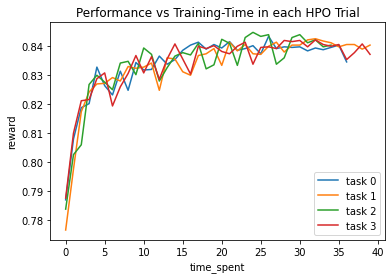

In [5]:
#Get the best model

predictor_label = task.fit(train, label='label', 
                           #time_limits=3600, 
                           feature_columns=['title', 'body','n_digits','n_exclaims','sent_bing','sent_afinn'],
                           ngpus_per_trial=1,
                           output_directory='ag_models',
                           hyperparameters=hyperparameters)

In [6]:
# Make predictions

predictions = predictor_label.predict(test)
predictions

/home/mileta/miniconda3/envs/autogluon/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([2, 0, 0, ..., 1, 0, 2])

In [7]:
# Prepare submission

submission = pd.read_csv("sample submission.csv")
submission['label'] = predictions
submission.to_csv('sub14.csv', index=False)
submission

,label
0,2
1,0
2,0
3,0
4,1
...,...
29995,0
29996,0
29997,1
29998,0
